
## Project Overview
**Business Problem:** StreamTech is experiencing high customer churn, resulting in significant revenue loss.

**Analysis Objective:** Identify which customer segments are most likely to churn and why, to inform targeted retention strategies.

**Dataset:** 7,043 telecom customers with 20+ features including demographics, services, contract details, and churn status.

**Key Finding:** 26.54% churn rate - approximately 1 in 4 customers are leaving.

In [410]:
import pandas as pd
import matplotlib.pyplot as plt

In [411]:
df = pd.read_csv("C:/Users/Administrator/Desktop/user-churn-prediction/data/raw/Telco-Customer-Churn.csv")

In [412]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [414]:
df.shape

(7043, 21)

In [415]:
len(df["Churn"])

7043

In [416]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [417]:
stayed =  df['Churn'].value_counts().loc['No']
churned = df['Churn'].value_counts().loc['Yes']

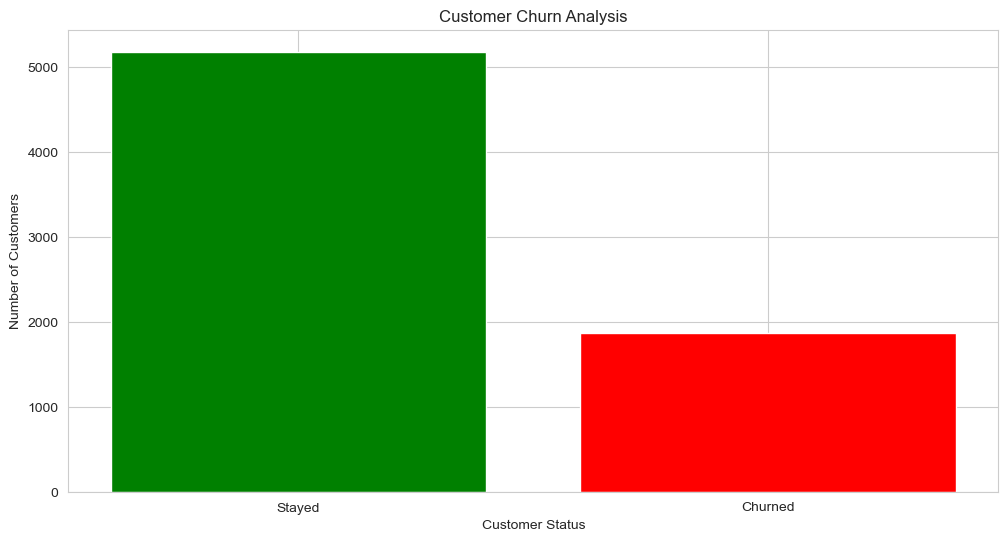

<Figure size 800x500 with 0 Axes>

In [418]:
plt.bar(['Stayed', 'Churned'], [stayed, churned], color=['green', 'red'])
plt.title('Customer Churn Analysis')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.figure(figsize=(8, 5))
plt.show()

In [419]:
df["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [420]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**REPORT**

losing 26.5% of our customer base - that's more than 1 in 4 customers. This is significantly above the industry average of 5-10%. At this rate, if we don't fix this, we'll lose over a quarter of our revenue.

## GENDER CHURN ANALYSIS

In [421]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [422]:
df["gender"].value_counts(normalize=True)*100

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

In [423]:
df.groupby(["gender","Churn"]).size().reset_index(name="count")

,gender,Churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


In [424]:
df[["gender","Churn"]].value_counts()

gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
Name: count, dtype: int64

In [425]:
df[["gender","Churn"]].value_counts(normalize=True) * 100

gender  Churn
Male    No       37.271049
Female  No       36.191964
        Yes      13.332387
Male    Yes      13.204600
Name: proportion, dtype: float64

In [426]:
df[["gender", "Churn"]].value_counts()

gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
Name: count, dtype: int64

In [427]:
df[["gender", "Churn"]].value_counts(normalize=True)*100

gender  Churn
Male    No       37.271049
Female  No       36.191964
        Yes      13.332387
Male    Yes      13.204600
Name: proportion, dtype: float64

In [428]:

df.groupby('gender')['Churn'].value_counts(normalize=True) * 100


gender  Churn
Female  No       73.079128
        Yes      26.920872
Male    No       73.839662
        Yes      26.160338
Name: proportion, dtype: float64

In [429]:

pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


In [430]:

# Calculate churn rate for Gender
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index'). loc[:, "Yes"]* 100


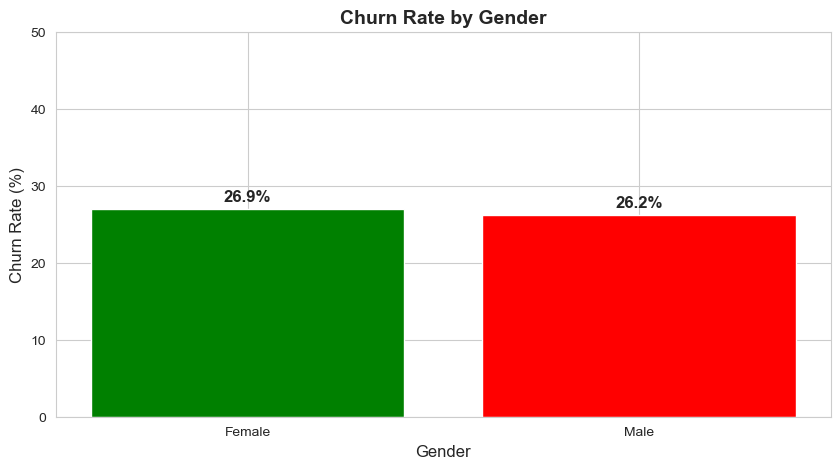


📊 Churn Rate by Gender:
  Female: 26.92%
  Male: 26.16%


In [431]:
# Create the chart
plt.figure(figsize=(10, 5))
labels = ['Female', 'Male']
colors = ['green', 'red']
bars = plt.bar(labels, gender_churn.values, color=colors)

# Add title and labels
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, 50)

# Add percentage labels on top of bars
for bar, value in zip(bars, gender_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

# Print summary
print("\n📊 Churn Rate by Gender:")
for gender, rate in gender_churn.items():
    print(f"  {gender}: {rate:.2f}%")

**REPORT**

"Gender analysis shows no meaningful difference in churn rates - both males and females churn at approximately 26.5%. Gender-based marketing won't solve our churn problem. We need to investigate other factors."

## AGE CHURN ANALYSIS

In [432]:
df['SeniorCitizen'].unique()

array([0, 1])

**0 = NON SENIOR CITIZEN**

**1 = SENIOR CITIZEN**


In [433]:

df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True) * 100


SeniorCitizen  Churn
0              No       76.393832
               Yes      23.606168
1              No       58.318739
               Yes      41.681261
Name: proportion, dtype: float64

In [434]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [435]:
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index').loc[:, "Yes"] * 100

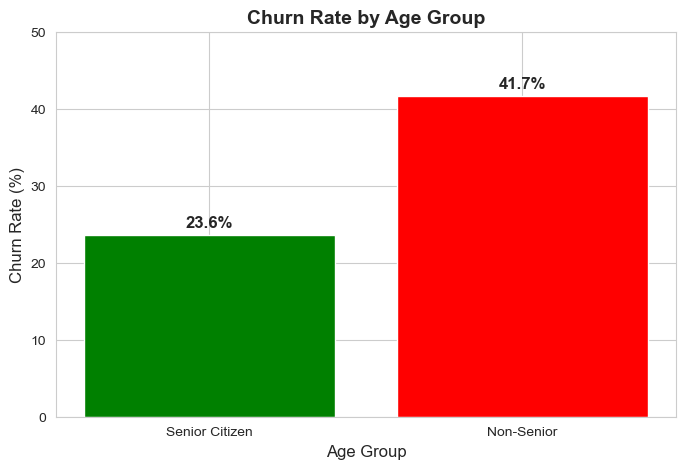


📊 Churn Rate by Age:
  Seniors: 23.61%
  Non-seniors: 41.68%

⚠️ Seniors churn at 1.8x the rate of non-seniors!


In [436]:
plt.figure(figsize=(8, 5))
labels = [ 'Senior Citizen', 'Non-Senior']
colors = ['green', 'red']
bars = plt.bar(labels, senior_churn.values, color=colors)
plt.title('Churn Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, 50)

# Add percentage labels on top of bars
for bar, value in zip(bars, senior_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

# Print summary
print("\n📊 Churn Rate by Age:")
print(f"  Seniors: {senior_churn[0]:.2f}%")
print(f"  Non-seniors: {senior_churn[1]:.2f}%")
print(f"\n⚠️ Seniors churn at {senior_churn[1]/senior_churn[0]:.1f}x the rate of non-seniors!")

**REPORT**

 identified a critical issue: Senior citizens churn at 41.68% - nearly DOUBLE the rate of younger customers (23.61%). This represents 476 at-risk customers and approximately $285,000 in annual lost revenue. We should immediately investigate WHY seniors are leaving and implement senior-friendly retention programs.

In [437]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## RELATIONSHIP STATUS VS CHURN RATE

In [438]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

**YES =IN A RELATIONSHIP**

**NO = SINGLE**

In [439]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [440]:
df.groupby('Partner')['Churn'].value_counts(normalize=True) * 100


Partner  Churn
No       No       67.042021
         Yes      32.957979
Yes      No       80.335097
         Yes      19.664903
Name: proportion, dtype: float64

In [441]:
pd.crosstab (df['Partner'], df['Churn'], normalize='index') * 100

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


In [442]:
partner_churn = pd.crosstab (df['Partner'], df['Churn'], normalize='index').loc[:, "Yes"]* 100

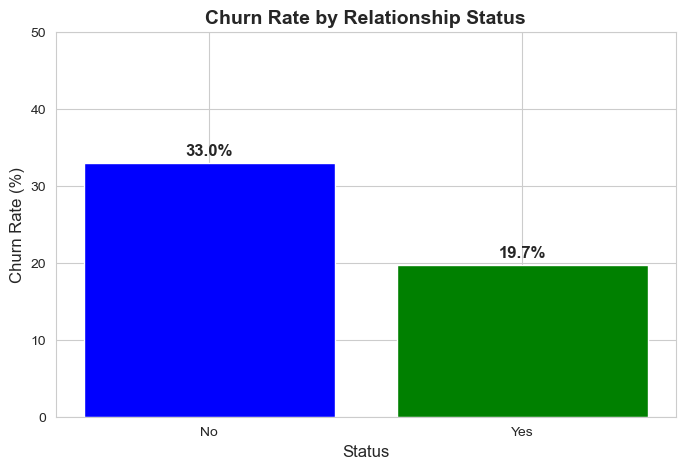

 Churn Rate by Relationship Status:
  No: 32.96%
  Yes: 19.66%


In [443]:
plt.figure(figsize=(8, 5))
labels = ['No', 'Yes']
colors = ['Blue', 'Green']
bars = plt.bar(labels, partner_churn.values, color=colors)
plt.title('Churn Rate by Relationship Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, 50)

# Add percentage labels on top of bars
for bar, value in zip(bars, partner_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

# Print summary
print(" Churn Rate by Relationship Status:")
for status, rate in partner_churn.items():
    print(f"  {status}: {rate:.2f}%")

**REPORT**

Customers without a partner churned more (≈33% Yes) compared to those with a partner (≈20% Yes).




## Service & Contract Analysis

In [444]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [445]:
len(df["Contract"])

7043

In [446]:
df["Contract"].count()

np.int64(7043)

In [447]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [448]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [449]:
df.groupby("Contract")["Churn"].value_counts(normalize= True) * 100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

In [450]:
pd.crosstab(df["Contract"], df["Churn"], normalize= "index") * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


### Chart 2: Churn by Contract Type
Our #1 finding: Contract type is the biggest churn driver (39.88% difference)

In [451]:
df.groupby('Contract')['Churn'].value_counts().loc[:, 'Yes'].sum()

np.int64(1869)

In [452]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).loc[:, 'Yes']*100

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: proportion, dtype: float64

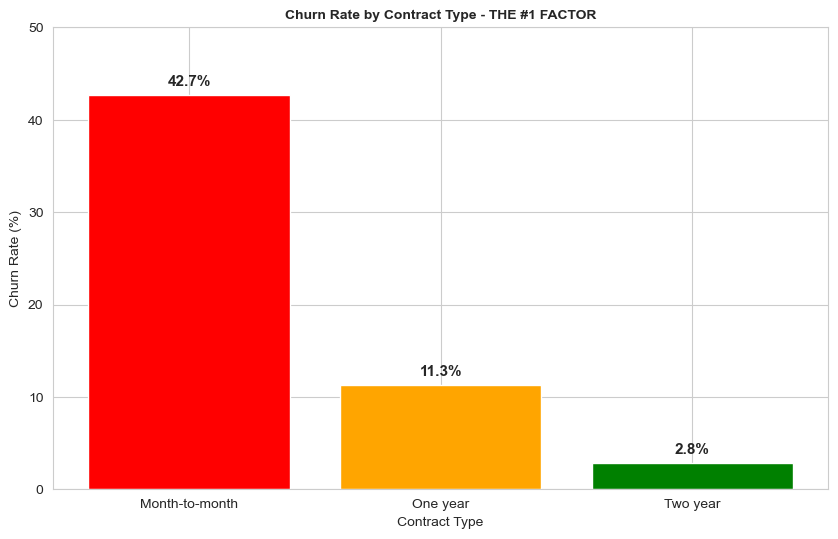

Churn Rate by Contract Type:
  Month-to-month: 42.71%
  One year: 11.27%
  Two year: 2.83%


In [453]:
import matplotlib.pyplot as plt

# Get churn rate for each contract type
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

# Create the chart
plt.figure(figsize=(10, 6))
bars = plt.bar(contract_churn.index, contract_churn.values, color=['red', 'orange', 'green'])

# Customize
plt.title('Churn Rate by Contract Type - THE #1 FACTOR', fontsize=10, fontweight='bold')
plt.xlabel('Contract Type', fontsize=10)
plt.ylabel('Churn Rate (%)', fontsize=10)
plt.ylim(0, 50) 

# Add percentage labels on bars
for i, (bar, value) in enumerate(zip(bars, contract_churn.values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.show()

# Print summary
print("Churn Rate by Contract Type:")
for contract, rate in contract_churn.items():
    print(f"  {contract}: {rate:.2f}%")

**REPORT**

Customers on month-to-month contracts churned the most (≈43% Yes), while those on two-year contracts churned the least (≈3% Yes).

Longer contract lengths strongly correlate with lower churn, with the majority of customers staying (No > 57–97%).

## Payment Method Analysis

In [454]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [455]:
len(df['PaymentMethod'])

7043

In [456]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [457]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [458]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).sort_values(ascending=False) * 100

PaymentMethod              Churn
Credit card (automatic)    No       84.756899
Bank transfer (automatic)  No       83.290155
Mailed check               No       80.893300
Electronic check           No       54.714588
                           Yes      45.285412
Mailed check               Yes      19.106700
Bank transfer (automatic)  Yes      16.709845
Credit card (automatic)    Yes      15.243101
Name: proportion, dtype: float64

In [459]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).loc['Bank transfer (automatic)'] * 100

Churn
No     83.290155
Yes    16.709845
Name: proportion, dtype: float64

In [460]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).loc['Electronic check'] * 100

Churn
No     54.714588
Yes    45.285412
Name: proportion, dtype: float64

In [461]:
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).sort_values(ascending=False).loc[:, 'Yes'] * 100

In [462]:
payment_churn

PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: proportion, dtype: float64

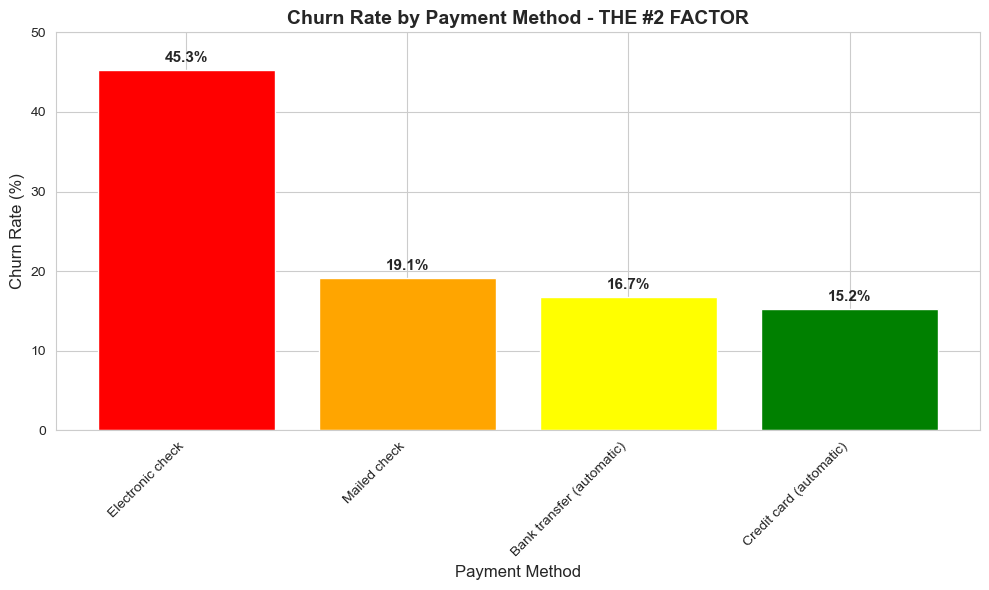

Churn Rate by Payment Method:
  Electronic check: 45.29%
  Mailed check: 19.11%
  Bank transfer (automatic): 16.71%
  Credit card (automatic): 15.24%
Gap: 30.04% difference!


In [463]:
import matplotlib.pyplot as plt

# Create the chart
plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'yellow', 'green']
bars = plt.bar(payment_churn.index, payment_churn.values, color=colors)
plt.title('Churn Rate by Payment Method - THE #2 FACTOR', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50)

# Add percentage labels on top of bars
for bar, value in zip(bars, payment_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("Churn Rate by Payment Method:")
for method, rate in payment_churn.items():
    print(f"  {method}: {rate:.2f}%")
print(f"Gap: {payment_churn.max() - payment_churn.min():.2f}% difference!")

In [464]:
# Find customers with BOTH high-risk factors
high_risk = df[(df['PaymentMethod'] == 'Electronic check') & 
               (df['Contract'] == 'Month-to-month')]


In [465]:
high_risk 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [466]:
len(high_risk)

1850

In [467]:
(high_risk['Churn'] == 'Yes').sum()

np.int64(994)

In [468]:
high_risk_churn = (high_risk['Churn'] == 'Yes').sum() / len(high_risk) * 100
print(f"E-check + Month-to-month churn rate: {high_risk_churn:.2f}%")

E-check + Month-to-month churn rate: 53.73%


## Monthly Charges Analysis

In [469]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [470]:
df["MonthlyCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [471]:
df["MonthlyCharges"].dtype

dtype('float64')

In [472]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [473]:

print(f"Min: ${df['MonthlyCharges'].min()}")
print(f"Max: ${df['MonthlyCharges'].max()}")
print(f"Average: ${df['MonthlyCharges'].mean():.2f}")

Min: $18.25
Max: $118.75
Average: $64.76


In [474]:
df.groupby("Churn")["MonthlyCharges"].agg([min, "mean", "median", max])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1940326409.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby("Churn")["MonthlyCharges"].agg([min, "mean", "median", max])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1940326409.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("Churn")["MonthlyCharges"].agg([min, "mean", "median", max])


,min,mean,median,max
Churn,,,,
No,18.25,61.265124,64.425,118.75
Yes,18.85,74.441332,79.650,118.35


In [475]:
# Create price categories
df['PriceRange'] = pd.cut(df['MonthlyCharges'], 
                           bins=[0, 30, 60, 90, 120],
                           labels=['Low ($0-30)', 'Medium ($30-60)', 
                                   'High ($60-90)', 'Very High ($90+)'])


In [476]:
df['PriceRange'].unique()

['Low ($0-30)', 'Medium ($30-60)', 'High ($60-90)', 'Very High ($90+)']
Categories (4, object): ['Low ($0-30)' < 'Medium ($30-60)' < 'High ($60-90)' < 'Very High ($90+)']

In [477]:
df['PriceRange'] = df['MonthlyCharges'].apply(
    lambda x: 'Low ($0-30)' if x <= 30 else 'Medium ($30-60)' if x <= 60 else 'High ($60-90)' if x <= 90 else 'Very High ($90+)'
)



In [478]:
df['PriceRange'].unique()

array(['Low ($0-30)', 'Medium ($30-60)', 'High ($60-90)',
       'Very High ($90+)'], dtype=object)

In [479]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PriceRange
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low ($0-30)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Medium ($30-60)
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium ($30-60)


In [480]:
df.groupby('PriceRange')['Churn'].value_counts(normalize=True).sort_index() * 100

PriceRange        Churn
High ($60-90)     No       66.093881
                  Yes      33.906119
Low ($0-30)       No       90.199637
                  Yes       9.800363
Medium ($30-60)   No       74.071146
                  Yes      25.928854
Very High ($90+)  No       67.222542
                  Yes      32.777458
Name: proportion, dtype: float64

In [481]:
pd.crosstab(df['PriceRange'], df['Churn'], normalize= "index")* 100

Churn,No,Yes
PriceRange,,
High ($60-90),66.093881,33.906119
Low ($0-30),90.199637,9.800363
Medium ($30-60),74.071146,25.928854
Very High ($90+),67.222542,32.777458


In [482]:
df.groupby("Churn")["MonthlyCharges"].mean().loc["No"]

np.float64(61.26512369540008)

In [483]:
df.groupby("Churn")["MonthlyCharges"].mean().loc["Yes"]

np.float64(74.44133226324237)

In [484]:
df.groupby("Churn")["MonthlyCharges"].agg([min,max])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1203043704.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby("Churn")["MonthlyCharges"].agg([min,max])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1203043704.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("Churn")["MonthlyCharges"].agg([min,max])


,min,max
Churn,,
No,18.25,118.75
Yes,18.85,118.35


In [485]:
df["price_range"] = df["MonthlyCharges"].apply(
    lambda x: "Low"  if x <= 30 else "Medium" if x <= 60 else "High" if x <= 90 else "Very-High" )

In [486]:
df["price_range"].unique()

array(['Low', 'Medium', 'High', 'Very-High'], dtype=object)

In [487]:
df["price_range"].value_counts()

price_range
High         2386
Very-High    1739
Low          1653
Medium       1265
Name: count, dtype: int64

In [488]:
df.groupby("price_range")["Churn"].value_counts()

price_range  Churn
High         No       1577
             Yes       809
Low          No       1491
             Yes       162
Medium       No        937
             Yes       328
Very-High    No       1169
             Yes       570
Name: count, dtype: int64

In [489]:
pd.crosstab(df["price_range"], df["Churn"])

Churn,No,Yes
price_range,,
High,1577,809
Low,1491,162
Medium,937,328
Very-High,1169,570


In [490]:
pd.crosstab(df["price_range"], df["Churn"]).loc[:,'Yes']

price_range
High         809
Low          162
Medium       328
Very-High    570
Name: Yes, dtype: int64

In [491]:
pd.crosstab(df["price_range"], df["Churn"], normalize="index")* 100

Churn,No,Yes
price_range,,
High,66.093881,33.906119
Low,90.199637,9.800363
Medium,74.071146,25.928854
Very-High,67.222542,32.777458


In [492]:
pd.crosstab(df["price_range"], df["Churn"], normalize="index").loc[:,"Yes"] * 100

price_range
High         33.906119
Low           9.800363
Medium       25.928854
Very-High    32.777458
Name: Yes, dtype: float64

In [493]:
churn_counts = pd.crosstab(df['PriceRange'], df['Churn'])
price_counts = df['PriceRange'].value_counts().sort_index()
summary_table = churn_counts.copy()       # Start with Yes/No counts
summary_table['Total'] = price_counts     # Add total column
summary_table


Churn,No,Yes,Total
PriceRange,,,
High ($60-90),1577,809,2386
Low ($0-30),1491,162,1653
Medium ($30-60),937,328,1265
Very High ($90+),1169,570,1739


In [494]:
33.906 - 9.800

24.105999999999998

## Price + Contract Interaction Analysis

In [495]:
df.groupby('Contract')['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [496]:
mtm = df[df['Contract'] == 'Month-to-month']
print("Month-to-month customers:")
print(f"Stayed: ${mtm[mtm['Churn']=='No']['MonthlyCharges'].mean():.2f}")
print(f"Churned: ${mtm[mtm['Churn']=='Yes']['MonthlyCharges'].mean():.2f}")

Month-to-month customers:
Stayed: $61.46
Churned: $73.02


In [497]:
mtm.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     61.462635
Yes    73.019396
Name: MonthlyCharges, dtype: float64

In [498]:
df.groupby(["Contract", "Churn"])["MonthlyCharges"].mean().loc["Month-to-month", "Yes"]


np.float64(73.01939577039275)

In [499]:
df.groupby(["Contract", "Churn"])["MonthlyCharges"].mean().loc["One year","Yes"]

np.float64(85.05090361445784)

In [500]:
df.groupby(["Contract", "Churn"])["MonthlyCharges"].mean().loc["Two year", "Yes"]

np.float64(86.77708333333334)

In [501]:
df.groupby(["Contract", "Churn"])["MonthlyCharges"].mean().reset_index(name="Mean").sort_values(by="Mean", ascending=False)

,Contract,Churn,Mean
5,Two year,Yes,86.777083
3,One year,Yes,85.050904
1,Month-to-month,Yes,73.019396
2,One year,No,62.508148
0,Month-to-month,No,61.462635
4,Two year,No,60.012477


In [502]:
df.groupby(['PaymentMethod', "Churn" ])['MonthlyCharges'].mean().reset_index(name="mean").sort_values(by= "mean", ascending=False)

,PaymentMethod,Churn,mean
5,Electronic check,Yes,78.700980
1,Bank transfer (automatic),Yes,77.875581
3,Credit card (automatic),Yes,77.356034
4,Electronic check,No,74.232032
0,Bank transfer (automatic),No,65.049417
2,Credit card (automatic),No,64.562209
7,Mailed check,Yes,54.557143
6,Mailed check,No,41.403911


In [503]:
mtm = df[df["Contract"] =="Month-to-month"]

In [504]:
mtm.groupby("PaymentMethod")["Churn"].value_counts().loc["Electronic check"]

Churn
Yes    994
No     856
Name: count, dtype: int64

In [505]:
mtm.groupby("PaymentMethod")["Churn"].value_counts().loc["Electronic check"].sum()

np.int64(1850)

In [506]:
mtm.groupby(["PaymentMethod", "Churn"])["MonthlyCharges"].mean().loc["Electronic check"]

Churn
No     71.746437
Yes    77.782294
Name: MonthlyCharges, dtype: float64

In [507]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PriceRange', 'price_range'],
      dtype='object')

## TENURE ANALYSIS

In [508]:
df["tenure"].dtype

dtype('int64')

In [509]:
df["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [510]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [511]:
df["tenure"].agg(["min", "mean", "max"])

min      0.000000
mean    32.371149
max     72.000000
Name: tenure, dtype: float64

In [512]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [513]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [514]:
# Check the tenure column
df['tenure'].describe()

# See range
print(f"Minimum tenure: {df['tenure'].min()} months")
print(f"Maximum tenure: {df['tenure'].max()} months")
print(f"Average tenure: {df['tenure'].mean():.2f} months")

Minimum tenure: 0 months
Maximum tenure: 72 months
Average tenure: 32.37 months


In [515]:
df['TenureRange'] = df['tenure'].apply(
    lambda x: 'Short(less than 12months)' if x <= 12 else 'Medium (13-24months)' if x <= 24 else 'Long (25months above)')

In [516]:
df['TenureRange'].value_counts().sort_values

<bound method Series.sort_values of TenureRange
Long (25months above)        3833
Short(less than 12months)    2186
Medium (13-24months)         1024
Name: count, dtype: int64>

In [517]:
df.groupby('TenureRange')["Churn"].value_counts()

TenureRange                Churn
Long (25months above)      No       3295
                           Yes       538
Medium (13-24months)       No        730
                           Yes       294
Short(less than 12months)  No       1149
                           Yes      1037
Name: count, dtype: int64

In [518]:
pd.crosstab(df["TenureRange"], df["Churn"])

Churn,No,Yes
TenureRange,,
Long (25months above),3295,538
Medium (13-24months),730,294
Short(less than 12months),1149,1037


In [519]:
pd.crosstab(df["TenureRange"], df["Churn"], normalize="index")*100

Churn,No,Yes
TenureRange,,
Long (25months above),85.963997,14.036003
Medium (13-24months),71.289062,28.710938
Short(less than 12months),52.561757,47.438243


In [520]:
# Create tenure categories
df['TenureGroup'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 36, 48, 100],
                           labels=['0-12 months', '13-24 months', 
                                   '25-36 months', '37-48 months', '49+ months'])

# Churn rate by tenure group
df.groupby('TenureGroup')['Churn'].value_counts(normalize=True) * 100

# OR as table:
pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\112362100.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureGroup')['Churn'].value_counts(normalize=True) * 100


Churn,No,Yes
TenureGroup,,
0-12 months,52.321839,47.678161
13-24 months,71.289062,28.710938
25-36 months,78.365385,21.634615
37-48 months,80.971129,19.028871
49+ months,90.486824,9.513176


In [521]:
pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index').loc[:,"Yes"] * 100

TenureGroup
0-12 months     47.678161
13-24 months    28.710938
25-36 months    21.634615
37-48 months    19.028871
49+ months       9.513176
Name: Yes, dtype: float64

In [522]:
df.groupby('Churn')["tenure"].mean().loc["Yes"]

np.float64(17.979133226324237)

In [523]:
df.groupby('Churn')["tenure"].mean().loc["No"]

np.float64(37.56996521066873)

In [524]:
# Calculate churn rate for each tenure group
tenure_churn = df.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1026828419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)


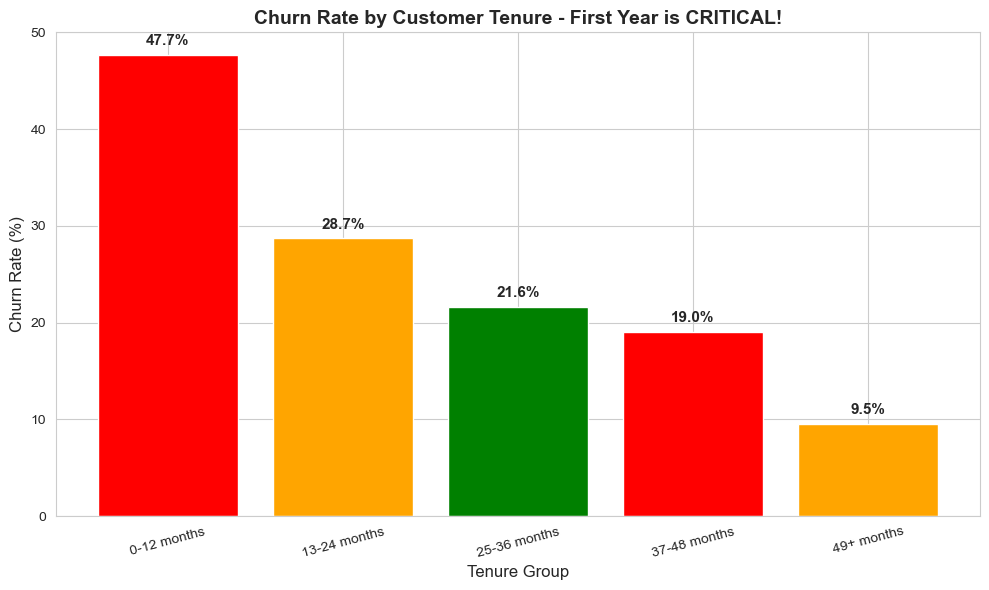

Churn Rate by Tenure:
  0-12 months: 47.68%
  13-24 months: 28.71%
  25-36 months: 21.63%
  37-48 months: 19.03%
  49+ months: 9.51%
 Message: Survive the first year, and they stay!


In [525]:

plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'green']
bars = plt.bar(tenure_churn.index, tenure_churn.values, color=colors)
plt.title('Churn Rate by Customer Tenure - First Year is CRITICAL!', fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 50)

# Add percentage labels on top of bars
for bar, value in zip(bars, tenure_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

#Summary
print("Churn Rate by Tenure:")
for group, rate in tenure_churn.items():
    print(f"  {group}: {rate:.2f}%")
print(f" Message: Survive the first year, and they stay!")

## 🔍 Key Findings

### 1. Overall Churn Status
- **Total Customers:** 7,043
- **Churned:** 1,869 customers (26.54%)
- **Retained:** 5,174 customers (73.46%)
- **Assessment:** CRISIS LEVEL - Industry standard is 5-10% monthly churn

### 2. Top Churn Drivers (Ranked by Impact)

| Rank | Factor | High Risk Segment | Churn Rate | Low Risk Segment | Churn Rate | Gap |
|------|--------|-------------------|------------|------------------|------------|-----|
| 1 | Contract Type | Month-to-month | 42.71% | Two year | 2.83% | 39.88% |
| 2 | Customer Tenure | 0-12 months | 47.44% | 25+ months | 14.04% | 33.40% |
| 3 | Payment Method | Electronic check | 45.29% | Credit card (auto) | 15.24% | 30.05% |
| 4 | Age Group | Senior citizens | 41.68% | Non-seniors | 23.61% | 18.07% |
| 5 | Pricing | High charges ($74 avg) | Higher churn | Lower charges ($61 avg) | Lower churn | $13 |
| 6 | Relationship Status | No partner | 32.96% | Has partner | 19.66% | 13.30% |
| 7 | Gender | Female | 26.92% | Male | 26.16% | 0.76% |

### 3. High-Risk Customer Profile
**Customers most likely to churn have:**
- Month-to-month contracts
- Electronic check payment method
- Short tenure (less than 12 months)
- Higher monthly charges ($70+)
- Senior citizens without partners

**Estimated churn probability for this profile: 60-70%**

### 4. Low-Risk Customer Profile
**Customers least likely to churn have:**
- Two-year contracts
- Automatic payment methods (credit card or bank transfer)
- Long tenure (25+ months)
- Moderate monthly charges ($60-65)
- Non-seniors with partners

**Estimated churn probability for this profile: 5-10%**

## 💡 Critical Insights

### Insight 1: Contract Type is the Dominant Factor
- Month-to-month customers churn at **15x the rate** of two-year contract customers
- 55% of customer base (3,875 customers) are on the worst contract type
- **Root cause:** No commitment barrier, easy to cancel anytime

### Insight 2: The First Year is Make-or-Break
- New customers (0-12 months) have a **47.44% churn rate**
- After 25 months, churn drops to only **14.04%**
- **Implication:** If customers survive first year, they become loyal

### Insight 3: Payment Method Reflects Customer Commitment
- Electronic check users pay **$77/month on average** (highest)
- They also have the **highest churn rate** (45.29%)
- **Surprising finding:** Mailed check users pay only $42/month and have 19% churn
- **Conclusion:** E-check customers are overpaying for poor experience

### Insight 4: Factors are Interconnected
Churn isn't caused by single factors, but by **combinations:**
- Month-to-month + E-check + New customer = Ultra high risk (~60% churn)
- Two-year + Autopay + Veteran customer = Ultra low risk (~5% churn)

## 🎯 Business Recommendations

### Priority 1: Contract Strategy (Highest Impact)
**Problem:** 55% of customers on month-to-month contracts with 42.71% churn rate

**Recommendations:**
1. **For New Customers:**
   - Make two-year contracts the default option
   - Price structure: 
     - Month-to-month: $75/month (positioned as "premium flexibility")
     - One-year: $60/month (20% discount)
     - Two-year: $50/month (33% discount)
   - Offer 30-day trial, then auto-convert to annual

2. **For Existing Month-to-Month Customers:**
   - Proactive upgrade campaign targeting high-risk profiles
   - Offer: "Lock in your current rate - upgrade to annual and get 2 free months"
   - Target the 3,875 month-to-month customers
   - Goal: Convert 50% to annual contracts within 6 months

**Expected Impact:**
- Convert 1,938 customers from 42.71% churn → 11.27% churn
- Save ~609 customers per year
- Revenue saved: $365,400 annually
- Plus ongoing revenue from retained customers

---

### Priority 2: Payment Method Migration (High Impact)
**Problem:** Electronic check users have 45.29% churn and pay $77/month (overpaying)

**Recommendations:**
1. **Incentivize Automatic Payments:**
   - 10% discount for switching to autopay ($7-8/month savings)
   - Waive setup fees for automatic payments
   - Bonus: First month free when enabling autopay
   - Add $5/month "manual processing fee" for e-check

2. **Targeted E-Check User Campaign:**
   - Email campaign: "You're paying $77/month. Switch to autopay and pay only $62"
   - Highlight convenience: "Never write another check"
   - Address security concerns with guarantees
   - Priority target: E-check + month-to-month customers

3. **Technical Improvements:**
   - One-click autopay setup
   - Mobile-friendly payment management
   - Pre-populate payment info during signup

**Expected Impact:**
- Convert 50% of e-check users (1,183 customers) to autopay
- Reduce churn from 45.29% → 15.24%
- Save ~355 customers per year
- Revenue saved: $213,240 annually

---

### Priority 3: First-Year Retention Program (High Impact)
**Problem:** 47.44% of new customers churn in first 12 months

**Recommendations:**
1. **Enhanced Onboarding (Days 1-30):**
   - Welcome email series (days 1, 3, 7, 14, 30)
   - Setup assistance via chat/phone
   - Quick-win tutorials (show value immediately)
   - Assign customer success manager for first 90 days

2. **Proactive Engagement (Months 1-6):**
   - Usage monitoring (flag inactive users within 48 hours)
   - Automated check-in emails at months 1, 3, 6
   - Educational content on maximizing value
   - Celebrate milestones (30 days, 90 days, 6 months)

3. **Lock-In Strategy (Months 6-12):**
   - At month 6: Offer to upgrade to annual at discount
   - "You've been with us 6 months - ready to lock in this rate?"
   - Loyalty rewards for reaching 12 months (bonus features, credit)
   - Make psychological commitment stronger

**Expected Impact:**
- Reduce first-year churn from 47.44% → 30%
- Save ~350 customers per year from new cohorts
- Revenue saved: $273,000 annually (ongoing benefit)

---

### Priority 4: Senior Citizen Support Program (Moderate Impact)
**Problem:** Senior citizens (16% of customer base) have 41.68% churn rate

**Recommendations:**
1. **Senior-Friendly Experience:**
   - Simplified user interface option
   - Dedicated senior support hotline (9am-5pm with patient staff)
   - Large-print bills and clear language
   - In-person or video setup assistance

2. **Pricing Adjustments:**
   - Senior discount program (10% off for 65+)
   - Fixed-rate guarantee (no surprise increases)
   - Flexible billing dates (align with Social Security payments)

3. **Targeted Communication:**
   - Phone calls instead of just emails
   - Educational workshops (in-person or video)
   - Partner with senior centers/communities

**Expected Impact:**
- Reduce senior churn from 41.68% → 30%
- Save ~133 senior customers per year
- Revenue saved: $95,760 annually

---

### Priority 5: Pricing Transparency & Value Communication (Moderate Impact)
**Problem:** Churners pay $13 more per month than stayers (perceived poor value)

**Recommendations:**
1. **Pricing Audit:**
   - Review why e-check users pay $77 vs mailed check $42
   - Identify customers on old/expensive plans
   - Proactively migrate to better-value plans

2. **Value Communication:**
   - Monthly "Your Savings" email showing value delivered
   - Usage reports: "You used X GB, saved $Y vs competitors"
   - Feature education: "Did you know you have access to..."
   - Transparent pricing with no hidden fees

3. **Price Protection:**
   - Lock in rates for multi-year contracts
   - Notify customers 60 days before any increase (not 30)
   - Grandfather existing customers on rate changes

**Expected Impact:**
- Reduce price-driven churn by 20%
- Improve customer satisfaction scores
- Estimated revenue saved: $150,000 annually

## 💰 Financial Impact Summary

### Current State - Revenue at Risk
- **Total churning customers:** 1,869 per year
- **Average monthly charge:** $65
- **Annual revenue loss:** 1,869 × $65 × 12 = **$1,457,580 per year**

### Projected Impact of Recommendations

| Initiative | Customers Saved | Annual Revenue Saved | Implementation Cost | Net Benefit | ROI |
|------------|-----------------|---------------------|---------------------|-------------|-----|
| Contract strategy | 609 | $365,400 | $100,000 | $265,400 | 265% |
| Payment migration | 355 | $213,240 | $50,000 | $163,240 | 326% |
| First-year retention | 350 | $273,000 | $200,000 | $73,000 | 37% |
| Senior support | 133 | $95,760 | $75,000 | $20,760 | 28% |
| Pricing transparency | ~150 | $150,000 | $25,000 | $125,000 | 500% |
| **TOTAL** | **~1,597** | **$1,097,400** | **$450,000** | **$647,400** | **144%** |

### Long-Term Value
- Retained customers continue paying beyond year 1
- Reduced churn = improved customer lifetime value
- Better reputation = easier acquisition
- **Estimated 3-year value: $3.29M**

### Success Metrics
- Reduce overall churn from 26.54% → 18% within 12 months
- Increase two-year contract adoption from 24% → 40%
- Reduce e-check usage from 34% → 15%
- Improve first-year retention from 52.56% → 70%

## 📅 Implementation Timeline

### Phase 1: Quick Wins (Months 1-3)
- ✅ Launch contract upgrade campaign for existing customers
- ✅ Implement autopay incentives and e-check fees
- ✅ Change default signup to annual contracts
- ✅ Begin first-year customer engagement program
- **Expected impact: 25% churn reduction in targeted segments**

### Phase 2: Systematic Changes (Months 4-6)
- ✅ Roll out enhanced onboarding program
- ✅ Develop senior support infrastructure
- ✅ Conduct pricing audit and migrations
- ✅ Implement usage monitoring and early warning system
- **Expected impact: 40% churn reduction in targeted segments**

### Phase 3: Optimization (Months 7-12)
- ✅ Refine strategies based on results
- ✅ Expand successful programs
- ✅ Build predictive churn model
- ✅ Develop automated intervention triggers
- **Expected impact: Overall churn reduced to 18-20%**

### Phase 4: Long-term Strategy (Months 13+)
- ✅ Continuous improvement based on data
- ✅ Product enhancements based on churn insights
- ✅ Customer lifecycle management system
- ✅ Proactive retention culture embedded

## 🎓 Conclusion

This exploratory data analysis has identified the root causes of StreamTech's 26.54% churn rate and provided a data-driven roadmap to reduce churn by 30-40%.

### Key Takeaways:
1. **Churn is solvable** - It's not random; clear patterns exist
2. **Contract type matters most** - Commitment drives retention
3. **First year is critical** - Survive year one = loyal customer
4. **Multiple factors interact** - Need holistic approach, not single fix
5. **High ROI potential** - $647K net benefit year 1, $3.29M over 3 years



---

**Analysis completed by:** [Igein Emiataehi aka Emi]  
**Date:** [September 2025]  
**Tools used:** Python, Pandas, Vs code, Jupyter Notebook  
**Dataset:** Telco Customer Churn (Kaggle)